In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import joblib

In [11]:
df = pd.read_excel("Данные_для_курсовои_Классическое_МО.xlsx")

df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = df.drop('Unnamed: 0', axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\NikLeo\AppData\Local\Temp\ipykernel_14064\3191577549.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


R²: 0.415
RMSE: 441.616

Топ-10 наиболее важных дескрипторов для IC50:
VSA_EState4         0.063315
Chi1n               0.041102
FpDensityMorgan3    0.040728
Chi4v               0.039197
Chi2v               0.038559
BCUT2D_MRLOW        0.033141
Chi2n               0.023839
SlogP_VSA5          0.021040
Chi3n               0.020503
EState_VSA4         0.019510
dtype: float64


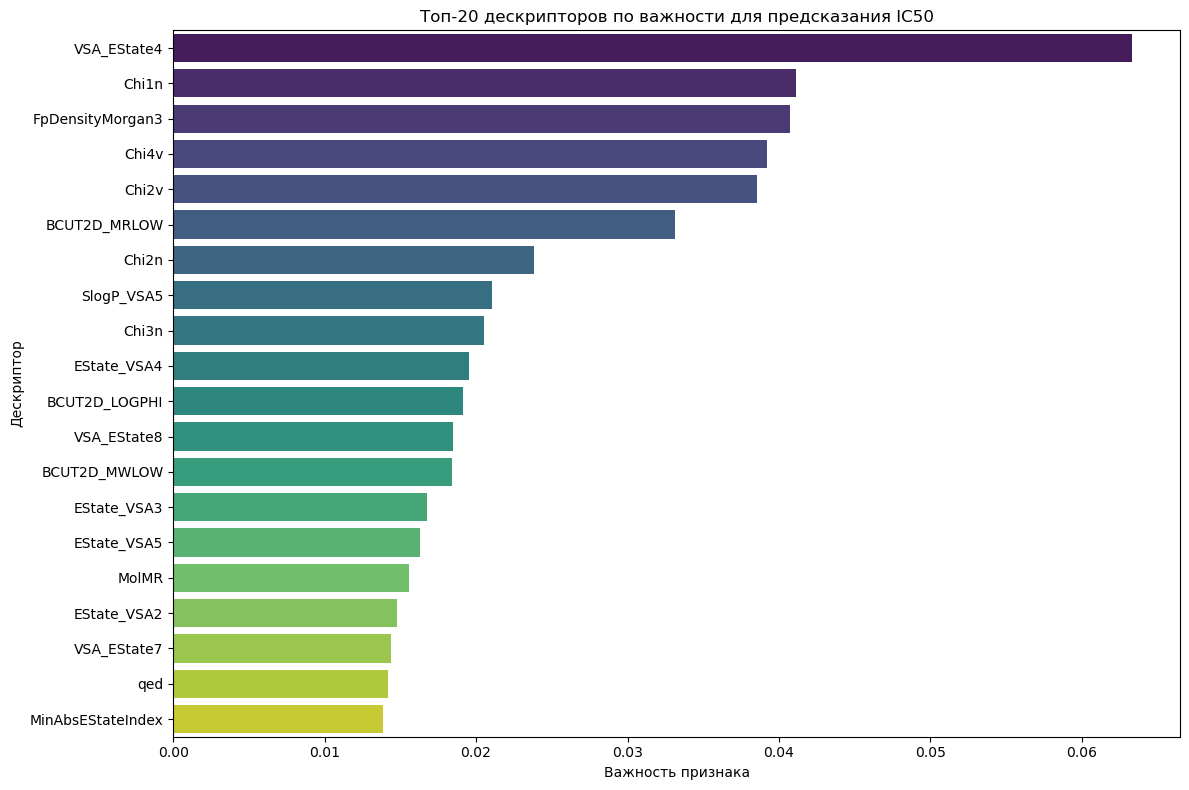

In [14]:
# Целевая переменная
target_variable = 'IC50, mM'

# Удаляем целевую и связанные переменные
X = df.drop([target_variable, 'CC50, mM', 'SI'], axis=1)
y = df[target_variable]


# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание и метрики
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Важность признаков
feature_importances = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

print("\nТоп-10 наиболее важных дескрипторов для IC50:")
print(feature_importances.head(10))

# Визуализация 
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(
    x=feature_importances.head(top_n),
    y=feature_importances.head(top_n).index,
    palette='viridis'
)
plt.title(f'Tоп-{top_n} дескрипторов по важности для предсказания IC50')
plt.xlabel('Важность признака')
plt.ylabel('Дескриптор')
plt.tight_layout()
plt.show()

In [15]:
#Удалим данные, для дальнейшей обработки
cols_to_drop= ['CC50, mM', 'SI']
df = df.drop(cols_to_drop, axis=1)
df.head()

,"IC50, mM",MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,446.458903,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,398.366099,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,466.334799,...,0,0,0,0,0,0,0,0,0,0


### Инжиниринг признаков

In [16]:
# Целевая переменная
target = 'IC50, mM'

# Исключаем ненужные столбцы
cols_to_exclude = ['IC50, mM', 'CC50, mM', 'SI']
X = df.drop(columns=[col for col in cols_to_exclude if col in df.columns], errors='ignore')
y = df[target]

df_engineered = X.copy()

# Добавление новых признаков
if 'MolLogP' in df_engineered.columns and 'MolWt' in df_engineered.columns:
    df_engineered['MolLogP_x_MolWt'] = df_engineered['MolLogP'] * df_engineered['MolWt']

# Полиномиальные признаки
polynomial_features_cols = ['MolLogP', 'MolWt']
existing_poly_cols = [col for col in polynomial_features_cols if col in df_engineered.columns]

if existing_poly_cols:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df_engineered[existing_poly_cols])
    poly_feature_names = poly.get_feature_names_out(existing_poly_cols)

    new_poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_engineered.index)
    for col in new_poly_df.columns:
        if col not in df_engineered.columns:
            df_engineered[col] = new_poly_df[col]

if 'MolLogP' in df_engineered.columns:
    df_engineered['MolLogP_gt_3'] = (df_engineered['MolLogP'] > 3).astype(int)

if df_engineered.isnull().values.any():
    imputer = SimpleImputer(strategy='median')
    df_engineered = pd.DataFrame(imputer.fit_transform(df_engineered), columns=df_engineered.columns)


### Определение моделей и функции оценки

In [19]:
# Словарь моделей
regression_models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'Stacking': StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(random_state=42)),
            ('gb', GradientBoostingRegressor(random_state=42)),
            ('xgb', XGBRegressor(random_state=42))
        ],
        final_estimator=LinearRegression()
    )
}

def evaluate_model(name, model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {'Model': name, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, model

# Оценка всех моделей
evaluation_results = []
best_model = None
best_r2 = -np.inf
best_model_name = ''

for name, model in tqdm(regression_models.items(), desc="Оценка моделей"):
    metrics, trained_model = evaluate_model(name, model, df_engineered, y)
    evaluation_results.append(metrics)

    if metrics['R2'] > best_r2:
        best_r2 = metrics['R2']
        best_model = trained_model
        best_model_name = name

# Вывод результатов
results_df = pd.DataFrame(evaluation_results).sort_values(by="R2", ascending=False)
print("Результаты моделей:")
print(results_df)

print(f"\nЛучшая модель: {best_model_name} (R2 = {best_r2:.4f})")

Оценка моделей: 100%|████████████████████████████████████████████████████████████████████| 8/8 [01:15<00:00,  9.39s/it]

Результаты моделей:
                  Model            MSE        RMSE        R2
1         Random Forest  194101.406778  440.569412  0.418090
6              CatBoost  194739.620044  441.293123  0.416177
5               XGBoost  197471.170456  444.377284  0.407988
3  HistGradientBoosting  198022.636653  444.997345  0.406334
2     Gradient Boosting  199941.025329  447.147655  0.400583
7              Stacking  209386.393901  457.587581  0.372266
4              AdaBoost  214720.287286  463.379205  0.356275
0                   KNN  274384.736633  523.817465  0.177403

Лучшая модель: Random Forest (R2 = 0.4181)


In [20]:
### Визуализируем

C:\Users\NikLeo\AppData\Local\Temp\ipykernel_14064\3815027730.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=sorted_df, palette='viridis')


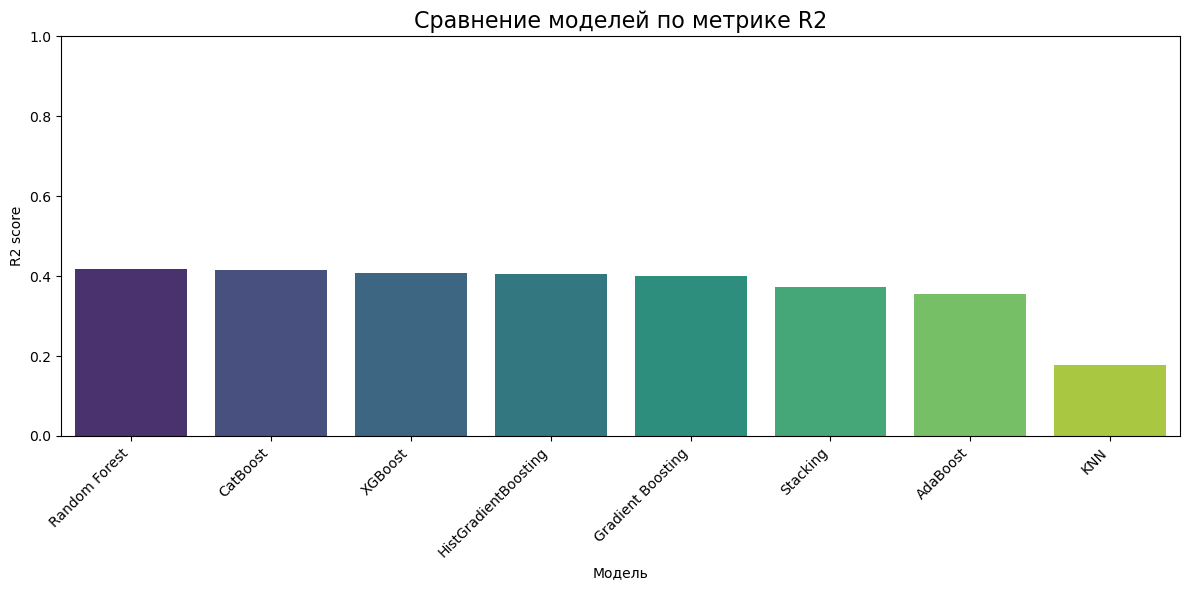


Результаты моделей (таргет: CC50, mM):


,Model,MSE,RMSE,R2
1,Random Forest,"194,101.407",440.569,0.418
6,CatBoost,"194,739.620",441.293,0.416
5,XGBoost,"197,471.170",444.377,0.408
3,HistGradientBoosting,"198,022.637",444.997,0.406
2,Gradient Boosting,"199,941.025",447.148,0.401
7,Stacking,"209,386.394",457.588,0.372
4,AdaBoost,"214,720.287",463.379,0.356
0,KNN,"274,384.737",523.817,0.177


In [21]:
from IPython.display import display

# Сортировка и округление результатов
results_df = pd.DataFrame(evaluation_results).sort_values(by='R2', ascending=False).round(3)

# Функция отображения графика сравнения моделей
def plot_model_comparison(df, metric='R2'):
    sorted_df = df.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=sorted_df, palette='viridis')
    plt.title(f'Сравнение моделей по метрике {metric}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    if metric == 'R2':
        plt.ylim(0, 1)
    plt.ylabel(f'{metric} score')
    plt.xlabel('Модель')
    plt.tight_layout()
    plt.show()

plot_model_comparison(results_df)

# Функция красивого отображения таблицы
def display_beautiful_table(df):
    styles = [
        {'selector': 'th', 'props': [
            ('background-color', '#40466e'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f5f5f5')]},
        {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', 'white')]},
        {'selector': 'tr:hover', 'props': [('background-color', '#ffff99')]}
    ]

    return (df.style
              .set_table_styles(styles)
              .format({'MSE': '{:,.3f}', 'RMSE': '{:,.3f}', 'R2': '{:,.3f}'})
              .highlight_max(subset=['R2'], color='#90EE90')
              .highlight_min(subset=['R2'], color='#FFCCCB'))

print("\nРезультаты моделей (таргет: CC50, mM):")
display(display_beautiful_table(results_df))

In [22]:
# Сохранение лучшей модели
if best_model is not None and not results_df.empty:
    best_model_name = results_df.iloc[0]['Model']
    filename = f'best_model_for_RegIC_50_{best_model_name}.pkl'
    
    
    joblib.dump(best_model, filename)
    print(f"\nЛучшая модель '{best_model_name}' успешно сохранена в файл: {filename}")


Лучшая модель 'Random Forest' успешно сохранена в файл: best_model_for_RegIC_50_Random Forest.pkl


Модель Random Forest заняла лидирующую позицию по точности прогнозов, продемонстрировав наименьшее значение ошибки (MSE ≈ 194,101) и наибольший коэффициент детерминации R² = 0.418. Хотя абсолютное значение R² остаётся умеренным, оно указывает на то, что модель объясняет около 42% дисперсии целевой переменной — это приемлемо для сложных биологических данных. Random Forest также отличается устойчивостью к переобучению и хорошей интерпретируемостью.

Модель CatBoost заняла второе место с минимальным отставанием (R² = 0.416), показав практически идентичные значения MSE и RMSE. Учитывая это, CatBoost остаётся отличным выбором, особенно если данные содержат категориальные признаки или сложные нелинейные зависимости. Близость результатов CatBoost и Random Forest подтверждает высокую надёжность ансамблевых деревьев решений в данной задаче.

Модели XGBoost, HistGradientBoosting и Gradient Boosting находятся в диапазоне R² от 0.401 до 0.408, что говорит о стабильной, но слегка уступающей производительности. Эти методы остаются перспективными, особенно при дальнейшем тюнинге гиперпараметров или применении расширенного препроцессинга. Их ошибки (RMSE около 445) указывают на всё ещё достаточно высокое качество предсказаний.

Модель Stacking, вопреки ожиданиям, не превзошла базовые ансамбли, показав R² = 0.372 и более высокую ошибку (RMSE ≈ 458). Это может быть связано с тем, что финальный мета-алгоритм (возможно, линейная регрессия) не смог эффективно объединить прогнозы отдельных моделей. Улучшение возможно при более сложной настройке стекинга.

AdaBoost снова демонстрирует отстающее качество (R² = 0.356), что может указывать на недостаточную гибкость алгоритма при работе с данной структурой признаков и уровнем шума в данных.

Модель K ближайших соседей (KNN) снова оказалась на последнем месте, показав R² = 0.177 и RMSE свыше 520. Это подтверждает слабую способность KNN улавливать закономерности в пространстве высокой размерности и его неэффективность при использовании в задачах регрессии на химико-биологических данных.

